# Traitement médical

## Imports nécessaires

In [1]:
from common import *## Initialisation de l'environnement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
np.random.seed(seed=0)

## Constantes locales

In [ ]:
REGRET_OUTPUT = 'fig/B-adversarial.pdf'

## Initialisation de l'environnement

In [2]:
T = 10000
adv_factor = 100
k = 3
epsilon=.1
real_means = [3./5., 1./5., 1./5.]
std_dev = .01
rewards = [list() for _ in range(len(real_means))]

for _ in range(adv_factor):
    random.shuffle(real_means)
    for i in range (T//adv_factor):
        it = np.random.choice(k, p=real_means)
        for j in range(len(rewards)):
            rewards[j].append(1 if j == it else 0)
    #for i, m in enumerate(real_means):
    #    rewards[i].extend(np.random.normal(m,std_dev,T//adv_factor))

bandits = [
    Uniform(k=k),
    EGreedy(epsilon=epsilon, k=k),
    UCB(k=k),
    EXP3(k=k),
]

## Évaluation des bandits sur K essais

In [3]:
## Évaluation des bandits sur K essaisxps = []

for t in range(T):
    for b in bandits:
        i = b.select()
        r = rewards[i][t]
        b.maj(r, i)
        
        xps.append({
            'bandit': MAP_NAME[b.__class__.__name__],
            'i': i,
            'r': r,
        })

## Calcul du regret cumulé

In [4]:
## Calcul du regret cumulédf = pd.DataFrame(xps)
df['regret'] = df.apply(lambda x: 1 - x['r'], axis=1)
df['cum_r'] = df.groupby('bandit')['r'].cumsum()
df['cum_regret'] = df.groupby('bandit')['regret'].cumsum()

In [5]:
df

bandit  i  r  regret  cum_r  cum_regret
0                              $\mathtt{UNI}$  1  0       1      0           1
1      $\mathtt{\varepsilon\textrm{-}Greedy}$  0  0       1      0           1
2                             $\mathtt{UCB1}$  0  0       1      0           1
3                             $\mathtt{EXP3}$  0  0       1      0           1
4                              $\mathtt{UNI}$  1  0       1      0           2
...                                       ... .. ..     ...    ...         ...
39995                         $\mathtt{EXP3}$  2  0       1   3506        6493
39996                          $\mathtt{UNI}$  2  1       0   3321        6679
39997  $\mathtt{\varepsilon\textrm{-}Greedy}$  1  0       1   3462        6538
39998                         $\mathtt{UCB1}$  0  0       1   5145        4855
39999                         $\mathtt{EXP3}$  1  0       1   3506        6494

[40000 rows x 6 columns]

## Graphique de la progression du regret cumulé

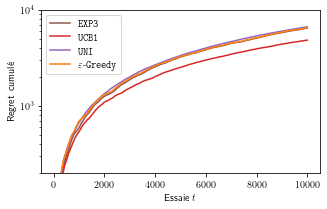

In [7]:
fig, ax = plt.subplots(figsize=(5,3))

for name, grp in df.groupby('bandit'):
    regret = grp.reset_index(drop=True)
    regret.plot(y='cum_regret', label=name, ax=ax, color=R_COLOR_MAP[name])

ax.legend()
ax.set_yscale('log')
ax.set_title('')
ax.set_ylim((200, 10000))
ax.set_xlabel('Essaie $t$')
ax.set_ylabel('Regret cumulé')

plt.savefig(REGRET_OUTPUT, transparent=True, bbox_inches='tight')